In [1]:
from google.colab import files
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import copy
import random
%matplotlib inline

In [2]:
# uploaded = files.upload()
# df = pd.read_csv("housing.csv")

In [3]:
df = pd.read_csv('/content/housing.csv')

In [4]:
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
features = [
    'location', 'housing_median_age', 'population',
    'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household'
]

df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
df["location"] = df["latitude"] * df["longitude"]

df = df.dropna()


x_train = df[features]
y_train = df['median_house_value']


corr = df[['location', 'housing_median_age', 'population',
    'households', 'median_income',
    'rooms_per_household', 'bedrooms_per_room', 'population_per_household', 'median_house_value']].corr()
print(corr)


                          location  housing_median_age  population  \
location                  1.000000           -0.033185    0.108632   
housing_median_age       -0.033185            1.000000   -0.295787   
population                0.108632           -0.295787    1.000000   
households                0.069245           -0.302768    0.907186   
median_income             0.059996           -0.118278    0.005087   
rooms_per_household      -0.090104           -0.153031   -0.071898   
bedrooms_per_room         0.110624            0.136089    0.035319   
population_per_household -0.001387            0.013258    0.070062   
median_house_value        0.105040            0.106432   -0.025300   

                          households  median_income  rooms_per_household  \
location                    0.069245       0.059996            -0.090104   
housing_median_age         -0.302768      -0.118278            -0.153031   
population                  0.907186       0.005087            -0.07189

In [6]:
means = np.mean(x_train, axis=0)
stds = np.std(x_train, axis=0)

x_train = (x_train - means) / stds

x_train = x_train.values.tolist()
y_train = y_train.tolist()

In [7]:
data = list(zip(x_train, y_train))
random.shuffle(data)

x_shuffled, y_shuffled = zip(*data)
x_shuffled = list(x_shuffled)
y_shuffled = list(y_shuffled)

split_index = int(0.8 * len(x_shuffled))
x_train = x_shuffled[:split_index]
y_train = y_shuffled[:split_index]
x_test = x_shuffled[split_index:]
y_test = y_shuffled[split_index:]

In [8]:
# fig, axes = plt.subplots(1, len(features), figsize=(120, 50))

# for i in range(len(features)):
#   axes[i].scatter(df[features[i]], y_train)


# plt.show()

In [9]:
m = len(x_train)
n = len(x_train[0])

b_init = 0
w_init = [random.random() for _ in range(n)]


In [10]:
def predict(x, w, b):
    return sum(x_i * w_i for x_i, w_i in zip(x, w)) + b


In [11]:
def compute_cost(X, y, w, b):
    m = len(X)
    cost = 0.0
    for i in range(m):
        f_wb_i = predict(X[i], w, b)
        cost += (f_wb_i - y[i])**2
    return cost / (2 * m)

In [12]:
cost = compute_cost(x_train, y_train, w_init, b_init)
print(cost)

28032484519.29904


In [13]:
def compute_gradient(X, y, w, b):
    m = len(X)
    n = len(X[0])
    dj_dw = [0.0] * n
    dj_db = 0.0
    for i in range(m):
        err = predict(X[i], w, b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i][j]
        dj_db += err
    dj_dw = [dw / m for dw in dj_dw]
    dj_db /= m
    return dj_db, dj_dw

In [14]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)

        # Update weights
        for j in range(len(w)):
            w[j] -= alpha * dj_dw[j]
        b -= alpha * dj_db

        # Track cost every iteration
        if i < 100000:
            cost = cost_function(X, y, w, b)
            J_history.append(cost)

        # Print progress every 5%
        if i % max(1, math.ceil(num_iters / 20)) == 0:
            print(f"Iteration {i:4d}: Cost {cost:.2e}, b {b}")

    return w, b, J_history


alpha = 0.01

w, b, J_history = gradient_descent(x_train, y_train, w_init, b_init, compute_cost, compute_gradient, alpha, 3000)
print(w)

Iteration    0: Cost 2.75e+10, b 2067.1175428134447
Iteration  150: Cost 4.41e+09, b 161326.30391526598
Iteration  300: Cost 3.04e+09, b 196572.28860702473
Iteration  450: Cost 2.86e+09, b 204353.29421321323
Iteration  600: Cost 2.81e+09, b 206055.41564102794
Iteration  750: Cost 2.79e+09, b 206418.396082582
Iteration  900: Cost 2.77e+09, b 206490.38339522932
Iteration 1050: Cost 2.77e+09, b 206501.52223123563
Iteration 1200: Cost 2.76e+09, b 206501.34405405002
Iteration 1350: Cost 2.75e+09, b 206499.91309597983
Iteration 1500: Cost 2.75e+09, b 206498.91755681587
Iteration 1650: Cost 2.75e+09, b 206498.4160542272
Iteration 1800: Cost 2.75e+09, b 206498.2401801533
Iteration 1950: Cost 2.74e+09, b 206498.24931925855
Iteration 2100: Cost 2.74e+09, b 206498.35411732778
Iteration 2250: Cost 2.74e+09, b 206498.50247667052
Iteration 2400: Cost 2.74e+09, b 206498.66534728248
Iteration 2550: Cost 2.74e+09, b 206498.82718075727
Iteration 2700: Cost 2.74e+09, b 206498.98014026167
Iteration 2850: 

In [15]:

def evaluate_metrics(y_true, y_pred):
    m = len(y_true)
    mae = sum(abs(y_t - y_p) for y_t, y_p in zip(y_true, y_pred)) / m
    rmse = math.sqrt(sum((y_t - y_p)**2 for y_t, y_p in zip(y_true, y_pred)) / m)
    mean_y = sum(y_true) / m
    ss_total = sum((y - mean_y)**2 for y in y_true)
    ss_res = sum((y_t - y_p)**2 for y_t, y_p in zip(y_true, y_pred))
    r2 = 1 - (ss_res / ss_total) if ss_total != 0 else 0
    return mae, rmse, r2



y_pred = [predict(x_i, w, b) for x_i in x_test]

print(evaluate_metrics(y_test, y_pred))

(54592.04639228777, 75035.51028542085, 0.5760912338656133)


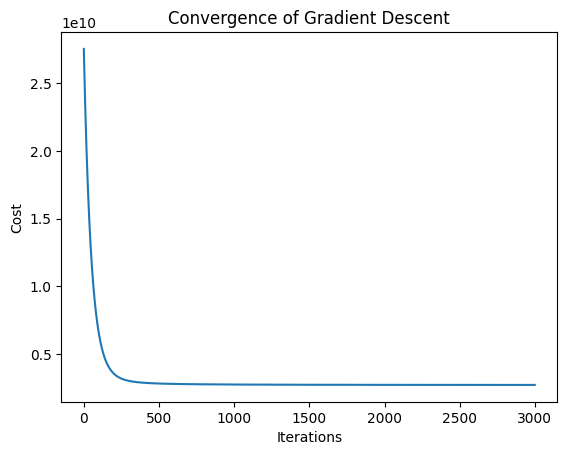

In [16]:
plt.plot(J_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Convergence of Gradient Descent")
plt.show()
